**1)Chargement du dataset**

In [5]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import ast
from sklearn.utils import shuffle

def load_dataset(csv_file):
    """Charge le dataset depuis un fichier CSV."""
    data = []
    labels = []
    with open(csv_file, 'r') as f:
        reader = csv.reader(f)
        next(reader)  # Ignorer l'en-tête
        for row in reader:
            labels.append(int(row[0]))  # La première colonne est le label
            board = ast.literal_eval(row[1])  # Convertir la représentation en liste
            board = [item for sublist in board for item in sublist]  # Aplatir en 1D
            data.append(board)
    return np.array(data), np.array(labels)

# Charger le dataset
file_path = "fanorona_dataset_cleaned.csv" 
data, labels = load_dataset(file_path)


**Mélange des données et repartition des données en trainSet et testSet**

In [6]:

# Mélanger les données
data, labels = shuffle(data, labels, random_state=42)
print("Exemple de données :", data[:5])
print("Exemple de labels :", labels[:5])

# Division des données
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

Exemple de données : [[-1  0  0  0  0  0  1  1  1]
 [ 0  0  0  0  0  0  0 -1 -1]
 [ 1  1  1  0  0  0  0  0  0]
 [-1 -1 -1  0  0  0  0  0  0]
 [-1  0  0  0 -1  0  0  0  0]]
Exemple de labels : [1 0 1 1 0]


**Entrainnement et prédiction à partir du modèle Arbre de Décision**

In [7]:
# Modèle Arbre de Décision
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

**Entrainnement et prédiction à partir du modèle KNN**

In [8]:

# Modèle KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)


KNeighborsClassifier()

Exemple 1 - Score Decision Tree: 0.00 | Score KNN: 0.00
Exemple 2 - Score Decision Tree: 0.00 | Score KNN: 0.00
Exemple 3 - Score Decision Tree: 0.14 | Score KNN: 0.00
Exemple 4 - Score Decision Tree: 0.00 | Score KNN: 0.00
Exemple 5 - Score Decision Tree: 0.67 | Score KNN: 0.60
Decision Tree Accuracy: 0.91
KNN Accuracy: 0.90


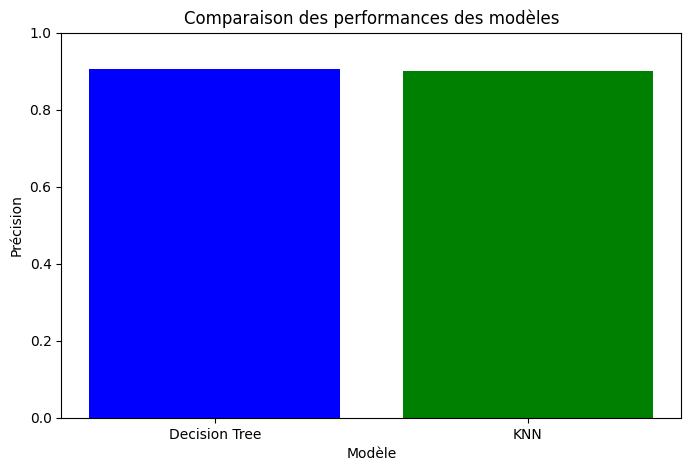

In [9]:

# Fonction pour obtenir le score d'une position
def get_position_score(position, model):
    """Retourne le score d'une position (probabilité d'être gagnante pour les blancs)."""
    position = np.array(position).reshape(1, -1)  # Reshape pour correspondre au modèle
    probas = model.predict_proba(position)  # Obtenir les probabilités
    return probas[0][1]  # Probabilité d'être gagnante

# Tester la fonction avec des exemples de X_test
for i in range(5):
    score_dt = get_position_score(X_test[i], dt_model)
    score_knn = get_position_score(X_test[i], knn_model)
    print(f"Exemple {i+1} - Score Decision Tree: {score_dt:.2f} | Score KNN: {score_knn:.2f}")

# Afficher les performances globales
y_pred_dt = dt_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
knn_accuracy = accuracy_score(y_test, y_pred_knn)

print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")
print(f"KNN Accuracy: {knn_accuracy:.2f}")

# Visualisation des performances
models = ["Decision Tree", "KNN"]
accuracies = [dt_accuracy, knn_accuracy]

plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['blue', 'green'])
plt.ylim(0, 1)
plt.xlabel("Modèle")
plt.ylabel("Précision")
plt.title("Comparaison des performances des modèles")
plt.show()


**2) Proposition pour améliorer les modèles à détecter les positions presque gagnantes et presque perdues**


Ajouter des Labels pour les Positions "Presque Gagnantes" et "Presque Perdues" 


**2 : presque gagnée** : où un joueur peut gagner en un coup. 


**-1 : presque perdue** : où l'adversaire peut gagner en un coup.


Augmenter les Données : on peut générer plus de données en effectuant des symétries et rotations sur les configurations.


On peut aussi essayer des modèles beaucoup plus puissants


Et on peut également optimiser les hyperparamètres